In [1]:
%pylab inline
from app.analysis import Quote
foreign = Quote.screen_funds('Equities', 'Foreign', max_expense=.8) + ['VT', 'ACWI', 'ACWV']
reit = Quote.screen_funds('Alternatives', min_assets=1, max_expense=.6)
commodity = Quote.screen_funds('Commodities', min_assets=.6, max_expense=1)
print(len(foreign), len(reit), len(commodity))
quote = Quote(foreign + reit + commodity, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
87 12 10
from 2019-07-26 to 2019-10-04 - 109


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

25


,len,mean,std,skew,shrp,yield,drawdown
Symbols,,,,,,,
SLV,46,0.128729,0.794235,-0.367425,0.153586,7.184843,13.195202
USRT,46,0.125839,0.228800,0.194698,0.520510,7.196337,2.115200
XLRE,46,0.119770,0.299979,-0.467354,0.376772,7.054681,3.765584
VNQ,46,0.114571,0.252672,0.128142,0.426737,6.669607,2.427592
ICF,46,0.111536,0.281448,-0.508310,0.372324,6.830022,3.517018
IAU,46,0.107890,0.418071,-0.180572,0.241931,6.346861,5.241934
SGOL,46,0.107087,0.417929,-0.166364,0.240091,6.248626,5.290905
GLD,46,0.105699,0.417757,-0.169356,0.236868,6.180780,5.311611
IYR,46,0.105477,0.259672,0.048086,0.380215,6.124182,2.710160


evicted ICF 0.892 -0.159
evicted DWX 0.885 -0.437
evicted EWW 0.797 -0.298
evicted SLV 0.764 -0.288
evicted RWX 0.579 -0.303
evicted EWJ 0.312 -0.459
retry backlogs ['GLD', 'REET', 'XLRE', 'BBJP', 'EFAV', 'ACWV', 'IYR', 'SGOL', 'VNQ', 'VNQI', 'RWR', 'RWO', 'SCHH', 'PSLV', 'IDV', 'EWT', 'DXJ'] at 0.905/-0.51 - 0.56
evicted ACWV 0.901 0.009
evicted XLRE 0.854 -0.206
evicted VNQI 0.828 -0.457
evicted PSLV 0.726 -0.271
retry backlogs ['SGOL', 'EFAV', 'SCHH', 'IYR', 'VNQ', 'RWR', 'GLD', 'IDV', 'RWO', 'BBJP', 'EWT', 'REET', 'DXJ'] at 0.910/-0.52 - 0.56
evicted EFAV 0.852 -0.173
evicted BBJP 0.320 -0.445
retry backlogs ['SGOL', 'IYR', 'VNQ', 'RWR', 'SCHH', 'GLD', 'RWO', 'EWT', 'IDV', 'REET', 'DXJ'] at 0.915/-0.53 - 0.56
evicted EWT 0.832 -0.526
retry backlogs ['SGOL', 'IYR', 'VNQ', 'RWR', 'SCHH', 'GLD', 'RWO', 'IDV', 'REET', 'DXJ'] at 0.920/-0.54 - 0.56
retry backlogs ['SGOL', 'GLD', 'IYR', 'VNQ', 'RWR', 'SCHH', 'RWO', 'IDV', 'REET', 'DXJ'] at 0.925/-0.55 - 0.56
retry backlogs ['SGOL', 'GLD',

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown,skewness
Portfolio,46.0,0.121835,0.205624,-0.304600,-0.035059,0.106700,0.241150,0.652988,0.559710,7.014549,2.219177,0.297842
USRT,46.0,0.125839,0.228800,-0.303443,-0.038244,0.118088,0.303959,0.646723,0.520510,7.196337,2.115200,0.194698
IAU,46.0,0.107890,0.418071,-0.787510,-0.186547,0.164584,0.389163,1.126842,0.241931,6.346861,5.241934,-0.180572


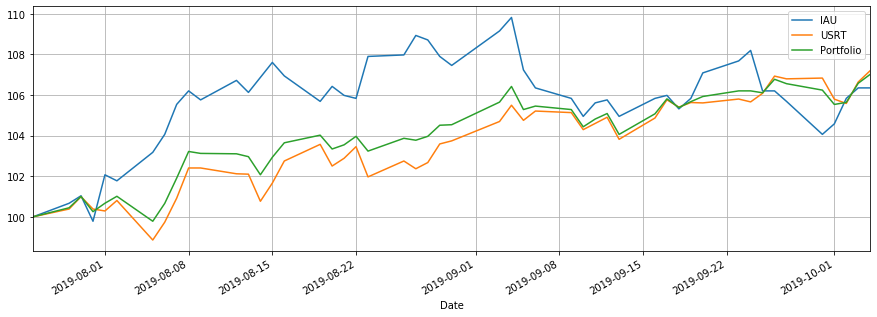

In [8]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['IAU', 'USRT'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown,skewness
Portfolio,46.0,0.121725,0.205656,-0.308337,-0.033789,0.107172,0.238942,0.653162,0.559083,7.009452,2.236632,0.294277
USRT,46.0,0.125839,0.228800,-0.303443,-0.038244,0.118088,0.303959,0.646723,0.520510,7.196337,2.115200,0.194698
IAU,46.0,0.107890,0.418071,-0.787510,-0.186547,0.164584,0.389163,1.126842,0.241931,6.346861,5.241934,-0.180572


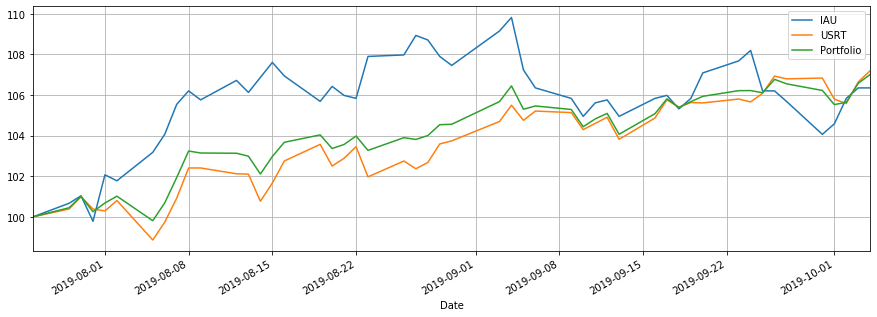

In [6]:
quote.setup_mask(['IAU', 'USRT'])
quote.graph({'IAU': 0.22, 'USRT': 0.78})